<a href="https://colab.research.google.com/github/Ian-G27/Clase_MetodosNumericos/blob/main/Metodo_Euler_Y_Taylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo de Euler

Programar en un cuaderno de Jupyter el algoritmo 5.1 de la página 199 del Burden de manera que imprima una tabla con el error absoluto (cuando sea posible). Usar como prueba el ejemplo de Ilustración de la página 199 y la tabla 5.1 de la página 201.

In [4]:
import sympy as sp
import pandas as pd
import numpy as np

def euler_tabla():
    t, y = sp.symbols('t y')
    #Ecuacion diferencial y solucion exacta
    f_sym = y - t**2 + 1
    y_exacta = (t + 1)**2 - 0.5 * sp.exp(t)
    #Funciones que son evaluables
    f = sp.lambdify((t, y), f_sym, 'numpy')
    y_real = sp.lambdify(t, y_exacta, 'numpy')
    #Parametros del problema, usando el ejemplo del libro
    a, b = 0, 2
    N = 10
    h = (b - a) / N
    t_vals = [a]
    w_vals = [0.5]
    y_vals = [y_real(a)]
    error_abs = [abs(0.5 - y_real(a))]
    #Iteraciones de Euler
    t_i = a
    w_i = 0.5

    for i in range(1, N+1):
        w_i = w_i + h * f(t_i, w_i)
        t_i = a + i * h
        t_vals.append(round(t_i, 1))
        w_vals.append(w_i)
        y_i = y_real(t_i)
        y_vals.append(y_i)
        error_abs.append(abs(w_i - y_i))
    #Imprimiendo los datos de la tabla
    tabla = pd.DataFrame({
        't_i': t_vals,
        'w_i (Euler)': w_vals,
        'y(t_i)': y_vals,
        '|w_i - y(t_i)|': error_abs
    })
    return tabla
#Por ultimo se ejecuta y muestra la tabla
tabla = euler_tabla()
print(tabla.to_string(index=False))

 t_i  w_i (Euler)   y(t_i)  |w_i - y(t_i)|
 0.0     0.500000 0.500000        0.000000
 0.2     0.800000 0.829299        0.029299
 0.4     1.152000 1.214088        0.062088
 0.6     1.550400 1.648941        0.098541
 0.8     1.988480 2.127230        0.138750
 1.0     2.458176 2.640859        0.182683
 1.2     2.949811 3.179942        0.230130
 1.4     3.451773 3.732400        0.280627
 1.6     3.950128 4.283484        0.333356
 1.8     4.428154 4.815176        0.387023
 2.0     4.865785 5.305472        0.439687


# Explicacion del codigo Metodo de euler



Librerias importadas:
```
import sympy as sp
import pandas as pd
import numpy as np

```
* sympy: para trabajar con funciones simbólicas.

* pandas: para crear una tabla con los resultados.

* numpy: se usa para cálculos numéricos rápidos.




Definicion de la funcion principal:
```
def euler_tabla():

```
Se define una función que cuando se llama, calcula la tabla de aproximaciones por el método de Euler.


Definicion simbolica del problema:


```
t, y = sp.symbols('t y')
f_sym = y - t**2 + 1
y_exacta = (t + 1)**2 - 0.5 * sp.exp(t)

```
Se define los simbolos t,y


Convierte las expresiones simbólicas a funciones evaluables:

```
f = sp.lambdify((t, y), f_sym, 'numpy')
y_real = sp.lambdify(t, y_exacta, 'numpy')

```
Convierte las expresiones simbólicas a funciones que aceptan valores numéricos(con ayuda de numpy).


Planteando los parámetros del problema:

```
a, b = 0, 2
N = 10
h = (b - a) / N

```



Inicialización de listas para la tabla:

```
t_vals = [a]
w_vals = [0.5]
y_vals = [y_real(a)]
error_abs = [abs(0.5 - y_real(a))]

```
* t_vals: tiempos.

* w_vals: soluciones por Euler.

* y_vals: soluciones exactas.

* error_abs: error absoluto en cada paso.




Iteración del método de Euler:

```
t_i = a
w_i = 0.5
for i in range(1, N+1):
    w_i = w_i + h * f(t_i, w_i)  # Fórmula de Euler
    t_i = a + i * h
    ...

```
* Se actuliza w_i+1

* Se calcula y(tᵢ) y se guarda junto al error



Por ultimo se crea la tabla:

```
tabla = pd.DataFrame({
    't_i': t_vals,
    'w_i (Euler)': w_vals,
    'y(t_i)': y_vals,
    '|w_i - y(t_i)|': error_abs
})

```



# Metodo de la serie de taylor de orden 2

Ajustar el código elaborado anteriormente para implementar el método de la Serie de Taylor de orden n usando la fórmula 5.17 (página 206) y usar el ejemplo 1 de esa página como prueba

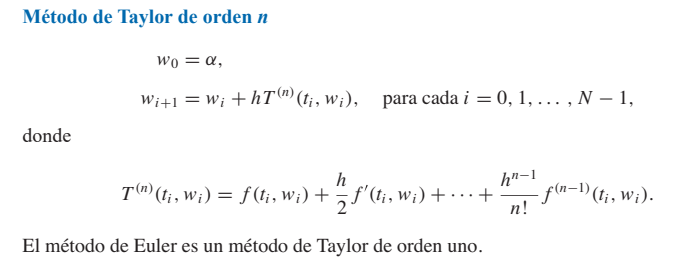

In [5]:
import sympy as sp
import pandas as pd
import numpy as np

def metodo_taylor_orden2_libro(f_sym, y_exacta, t0, w0, a, b, N):
    t, y = sp.symbols('t y')

    # Derivada de orden 1 de f(t, y)
    df = sp.diff(f_sym, t) + sp.diff(f_sym, y) * f_sym

    #Se convierten funciones a funciones numericas
    f = sp.lambdify((t, y), f_sym, 'numpy')
    f_prime = sp.lambdify((t, y), df, 'numpy')
    y_real = sp.lambdify(t, y_exacta, 'numpy')
    h = (b - a) / N
    t_vals = [round(t0 + i * h, 1) for i in range(N + 1)]
    w_vals = []
    errores = []

    t_i = t0
    w_i = w0

    for i in range(N + 1):
        y_i = float(y_real(t_i))
        w_vals.append(w_i)
        errores.append(abs(y_i - w_i))
        # Metodo de Taylor orden 2
        if i < N:
            T2 = f(t_i, w_i) + (h / 2) * f_prime(t_i, w_i)
            w_i += h * T2
            t_i += h

    tabla = pd.DataFrame({
        'tᵢ': t_vals,
        'Orden 2 de Taylor': [round(w, 6) for w in w_vals],
        '|y(tᵢ) - wᵢ|': [round(e, 6) for e in errores]
    })

    return tabla
#Se Define la función f(t, y) y solución exacta
t, y = sp.symbols('t y')
f_sym = y - t**2 + 1
y_exacta = (t + 1)**2 - 0.5 * sp.exp(t)
#Parametros del ejemplo del libro
t0 = 0
w0 = 0.5
a = 0
b = 2
N = 10
#Se ejecuta
tabla = metodo_taylor_orden2_libro(f_sym, y_exacta, t0, w0, a, b, N)

#Mostrando la tabla
print(tabla.to_string(index=False))

 tᵢ  Orden 2 de Taylor  |y(tᵢ) - wᵢ|
0.0           0.500000      0.000000
0.2           0.830000      0.000701
0.4           1.215800      0.001712
0.6           1.652076      0.003135
0.8           2.132333      0.005103
1.0           2.648646      0.007787
1.2           3.191348      0.011406
1.4           3.748645      0.016245
1.6           4.306146      0.022663
1.8           4.846299      0.031122
2.0           5.347684      0.042212


# Método de Taylor de orden 4


In [6]:
import sympy as sp
import pandas as pd
import numpy as np

def metodo_taylor_orden4_libro(f_sym, y_exacta, t0, w0, a, b, N):
    t, y = sp.symbols('t y')

    #Se Calculan las derivadas de f(t, y)
    derivadas = [f_sym]
    for i in range(1, 4):  # orden 4 -> derivadas hasta 3ra
        derivadas.append(sp.diff(derivadas[-1], t) + sp.diff(derivadas[-1], y) * f_sym)

    #Se convierten funciones evaluables numericamente
    deriv_funcs = [sp.lambdify((t, y), df, 'numpy') for df in derivadas]
    y_real = sp.lambdify(t, y_exacta, 'numpy')
    h = (b - a) / N
    t_vals = [round(t0 + i * h, 1) for i in range(N + 1)]
    w_vals = []
    errores = []

    t_i = t0
    w_i = w0

    for i in range(N + 1):
        y_i = float(y_real(t_i))
        w_vals.append(round(w_i, 6))
        errores.append(round(abs(y_i - w_i), 6))

        if i < N:
            #Terminos de la serie de Taylor de orden 4
            T4 = (
                deriv_funcs[0](t_i, w_i)
                + (h / 2) * deriv_funcs[1](t_i, w_i)
                + (h**2 / 6) * deriv_funcs[2](t_i, w_i)
                + (h**3 / 24) * deriv_funcs[3](t_i, w_i)
            )
            w_i += h * T4
            t_i += h

    tabla = pd.DataFrame({
        'tᵢ': t_vals,
        'Orden 4 de Taylor': w_vals,
        '|y(tᵢ) - wᵢ|': errores
    })

    return tabla
#Definiendo la función y solución exacta
t, y = sp.symbols('t y')
f_sym = y - t**2 + 1
y_exacta = (t + 1)**2 - 0.5 * sp.exp(t)

#Los parametros que se utilizan
t0 = 0
w0 = 0.5
a = 0
b = 2
N = 10

tabla = metodo_taylor_orden4_libro(f_sym, y_exacta, t0, w0, a, b, N)
#Por ultimo se muestra la tabla
print(tabla.to_string(index=False))

 tᵢ  Orden 4 de Taylor  |y(tᵢ) - wᵢ|
0.0           0.500000      0.000000
0.2           0.829300      0.000001
0.4           1.214091      0.000003
0.6           1.648947      0.000006
0.8           2.127240      0.000010
1.0           2.640874      0.000015
1.2           3.179964      0.000022
1.4           3.732432      0.000032
1.6           4.283529      0.000045
1.8           4.815238      0.000061
2.0           5.305555      0.000083


#Explicacion del codigo Metodo de taylor orden 2 y 4



Librerias importadas

```
import sympy as sp
import pandas as pd
```
* Importamos sympy para derivar simbólicamente.

* Importamos pandas para construir la tabla.


Creacion de la funcion:

```
def metodo_taylor_orden4_libro(f_sym, y_exacta, t0, w0, a, b, N):
```

* f_sym: función simbólica $f(t,y)$

* y_exacta: solución exacta simbólica (para calcular errores)

* t0: valor inicial de $t$

* w0: valor inicial de $y$

* a, b: intervalo

* N: número de pasos.


# Declaramos los simbolos para sympy

```
    t, y = sp.symbols('t y')

```

Calculamos las derivadas de f con la fórmula de derivadas totales:
```
    derivadas = [f_sym]
    for i in range(1, 4):
        derivadas.append(sp.diff(derivadas[-1], t) + sp.diff(derivadas[-1], y) * f_sym)

```

Esto se repite hasta obtener $f´, f´´ , f´´´$


Aqui convertimos las expresiones simbólicas a funciones de Python para evaluarlas con números y también convertimos la solución exacta.


```
    deriv_funcs = [sp.lambdify((t, y), df, 'numpy') for df in derivadas]
    y_real = sp.lambdify(t, y_exacta, 'numpy')

```

* Aqui se calcula el tamaño del paso h

* Tambien se crean listas para almacenar los valores de tᵢ, wᵢ y el error absoluto.
```
    h = (b - a) / N
    t_vals = [round(t0 + i * h, 1) for i in range(N + 1)]
    w_vals = []
    errores = []

```

# En este paso:

```
    for i in range(N + 1):
        y_i = float(y_real(t_i))
        w_vals.append(round(w_i, 6))
        errores.append(round(abs(y_i - w_i), 6))

```

* Evaluamos la solución exacta en tᵢ
* Guardamos wᵢ redondeado a 6 cifras,
* Calculamos y guardamos el error absoluto.

Se calcula la formula de taylor de orden 2 o 4
```
        if i < N:
            T4 = (
                deriv_funcs[0](t_i, w_i)
                + (h / 2) * deriv_funcs[1](t_i, w_i)
                + (h**2 / 6) * deriv_funcs[2](t_i, w_i)
                + (h**3 / 24) * deriv_funcs[3](t_i, w_i)
            )
            w_i += h * T4
            t_i += h

```

Se va actualizando el nuevo valor de wᵢ y tᵢ


Por ultimo se imprime una tabla:
```
    tabla = pd.DataFrame({
        'tᵢ': t_vals,
        'Orden 4 de Taylor': w_vals,
        '|y(tᵢ) - wᵢ|': errores
    })

    return tabla

```

